Connecting to Database

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_path = r"C:\Users\User\Downloads\Anaconda\Battery IoT (SQL)\battery.sqlite"
conn = sqlite3.connect(db_path)


Number of Cells by Chemistry Type

In [3]:
query = """
SELECT quimica, COUNT(*) AS cell_count
FROM Celula
GROUP BY quimica
ORDER BY cell_count DESC;
"""
df = pd.read_sql(query, conn)
print(df)

  quimica  cell_count
0     NMC           3
1     LFP           1


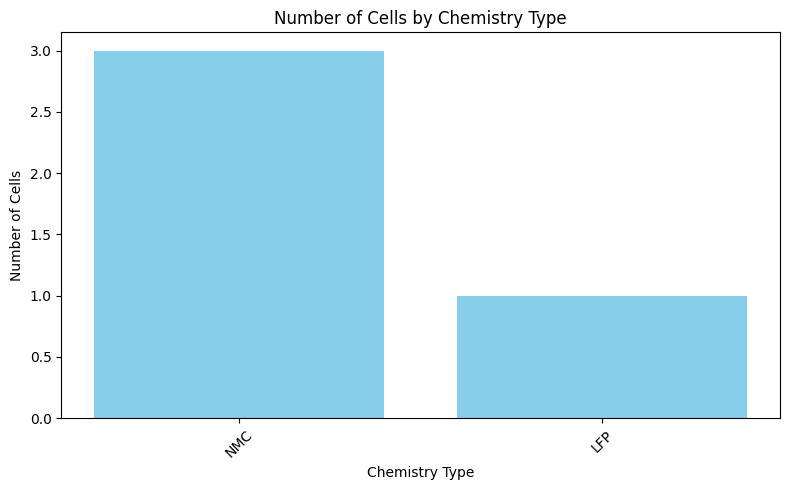

In [4]:
plt.figure(figsize=(8, 5))
plt.bar(df['quimica'], df['cell_count'], color='skyblue')
plt.title('Number of Cells by Chemistry Type')
plt.xlabel('Chemistry Type')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Temperature by Test Type

In [5]:
query = """
SELECT tipo_teste, AVG(temperatura) AS avg_temp
FROM Teste
GROUP BY tipo_teste
ORDER BY avg_temp DESC;
"""
df = pd.read_sql(query, conn)
print(df)

  tipo_teste  avg_temp
0        C20      40.0
1       UDDS      30.0
2       HPPC      20.0


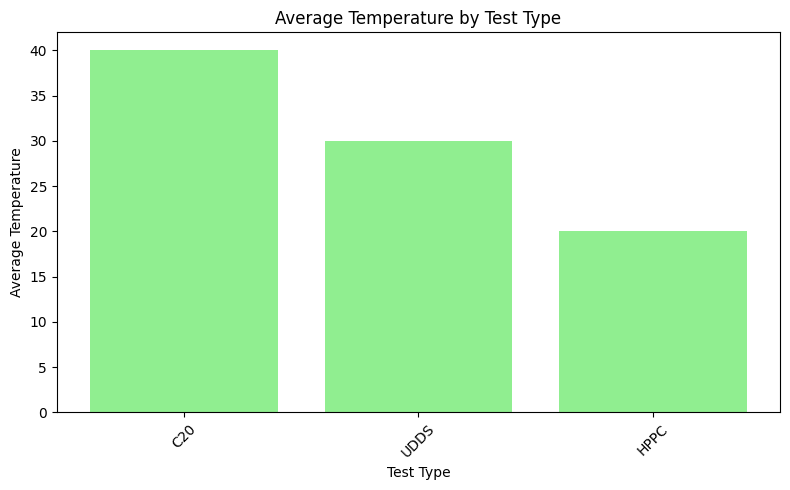

In [6]:
plt.figure(figsize=(8, 5))
plt.bar(df['tipo_teste'], df['avg_temp'], color='lightgreen')
plt.title('Average Temperature by Test Type')
plt.xlabel('Test Type')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Voltage and Current Over Time for Test ID 1

In [7]:
query = """
SELECT timestamp, tensao, corrente
FROM Valor_Teste
WHERE id_teste = 1
ORDER BY timestamp;
"""
df = pd.read_sql(query, conn)
print(df)

        timestamp    tensao  corrente
0             0.0  3.000000  0.000505
1             1.0  3.537463  0.000000
2             2.0  3.735884  0.000000
3             3.0  3.808637  0.000000
4             4.0  3.835219  0.000000
...           ...       ...       ...
153694   153694.0  3.604843 -0.220276
153695   153695.0  3.605887 -0.220876
153696   153696.0  3.605946 -0.219734
153697   153697.0  3.606022 -0.219132
153698   153698.0  3.604789 -0.219728

[153699 rows x 3 columns]


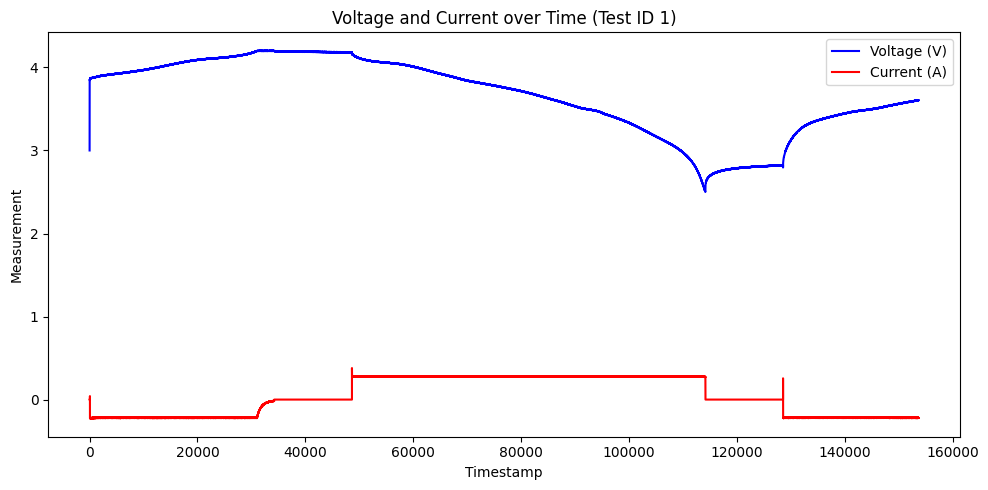

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['tensao'], label='Voltage (V)', color='blue')
plt.plot(df['timestamp'], df['corrente'], label='Current (A)', color='red')
plt.title('Voltage and Current over Time (Test ID 1)')
plt.xlabel('Timestamp')
plt.ylabel('Measurement')
plt.legend()
plt.tight_layout()
plt.show()

Temperature Change Over Time for Test ID 1

In [9]:
query = """
SELECT timestamp, temperatura
FROM Valor_Teste
WHERE id_teste = 1
ORDER BY timestamp;
"""
df = pd.read_sql(query, conn)
print(df)

        timestamp  temperatura
0             0.0    25.007703
1             1.0    33.758353
2             2.0    37.177299
3             3.0    38.475046
4             4.0    38.940227
...           ...          ...
153694   153694.0    35.645072
153695   153695.0    35.592274
153696   153696.0    35.589973
153697   153697.0    35.653063
153698   153698.0    35.729746

[153699 rows x 2 columns]


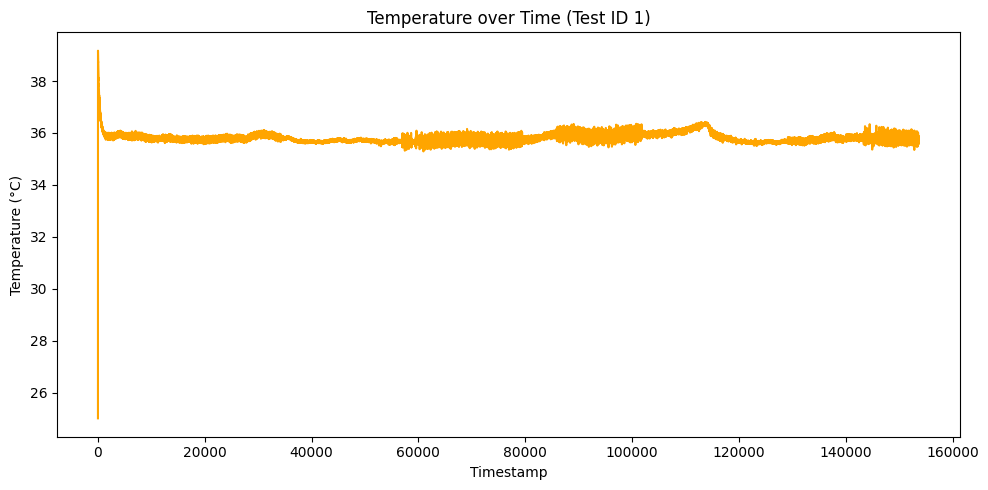

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['temperatura'], color='orange')
plt.title('Temperature over Time (Test ID 1)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

Number of Tests Per Chemistry Type

In [11]:
query = """
SELECT c.quimica, COUNT(t.id_teste) AS num_tests
FROM Celula c
JOIN Teste t ON c.id_celula = t.id_celula
GROUP BY c.quimica
ORDER BY num_tests DESC;
"""
df = pd.read_sql(query, conn)
print(df)

  quimica  num_tests
0     NMC          3
1     LFP          1


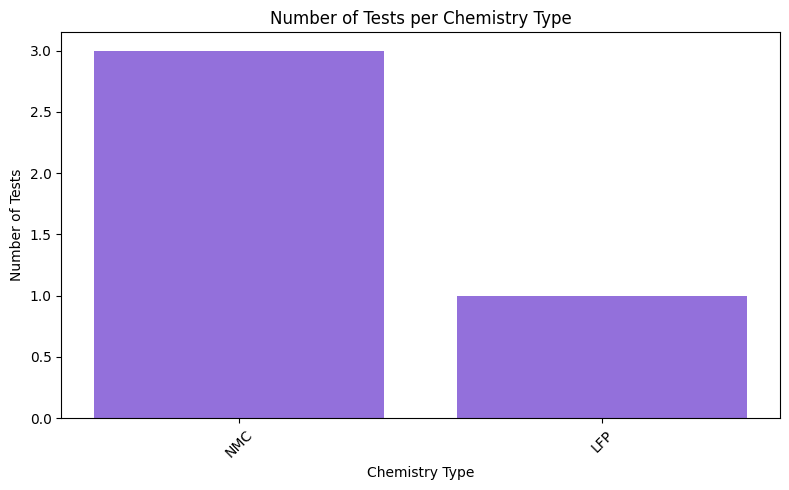

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(df['quimica'], df['num_tests'], color='mediumpurple')
plt.title('Number of Tests per Chemistry Type')
plt.xlabel('Chemistry Type')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Max, Min, and Average Voltage per Test

In [13]:
query = """
SELECT id_teste,
       MAX(tensao) AS max_voltage,
       MIN(tensao) AS min_voltage,
       AVG(tensao) AS avg_voltage
FROM Valor_Teste
GROUP BY id_teste
ORDER BY id_teste;
"""
df = pd.read_sql(query, conn)
print(df)

   id_teste  max_voltage  min_voltage  avg_voltage
0         1     4.201272     2.500557     3.657747
1         2     4.198293     3.000000     3.966374
2         3     4.087338     3.148014     3.703610
3         4     3.617643     0.000000     3.339016


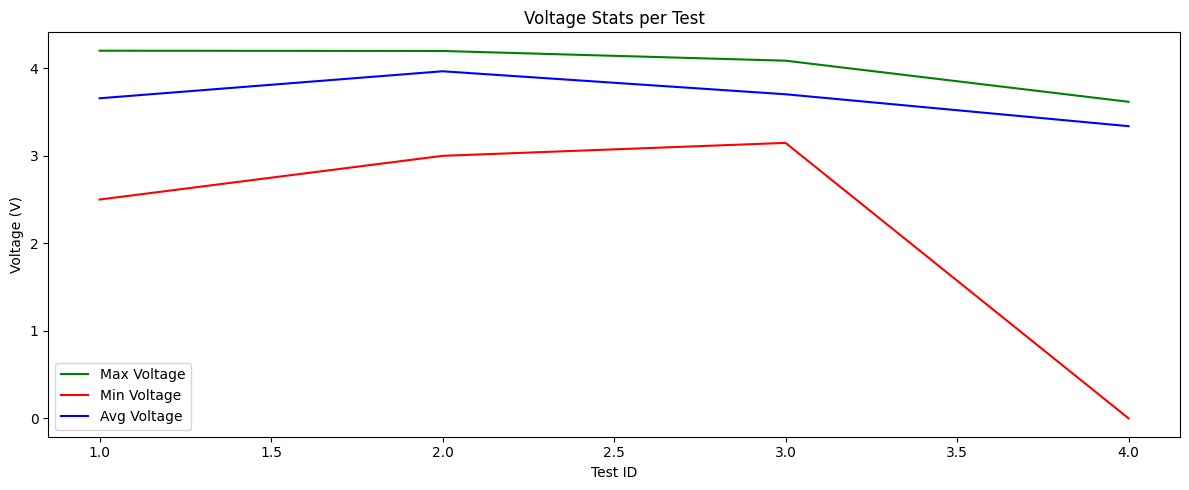

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df['id_teste'], df['max_voltage'], label='Max Voltage', color='green')
plt.plot(df['id_teste'], df['min_voltage'], label='Min Voltage', color='red')
plt.plot(df['id_teste'], df['avg_voltage'], label='Avg Voltage', color='blue')
plt.title('Voltage Stats per Test')
plt.xlabel('Test ID')
plt.ylabel('Voltage (V)')
plt.legend()
plt.tight_layout()
plt.show()

Average Power per Test (Voltage × Current)

Assuming power = voltage × current (P = V × I), compute average power per test.

In [15]:
query = """
SELECT id_teste,
       AVG(tensao * corrente) AS avg_power
FROM Valor_Teste
GROUP BY id_teste
ORDER BY avg_power DESC;
"""
df = pd.read_sql(query, conn)
print(df)

   id_teste  avg_power
0         3   1.997014
1         2   0.380135
2         4   0.164511
3         1   0.122623


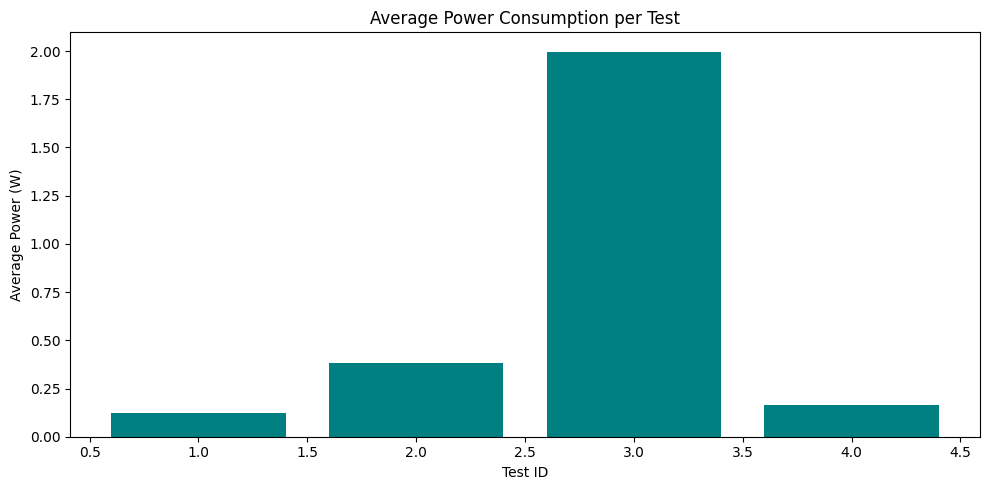

In [16]:
plt.figure(figsize=(10, 5))
plt.bar(df['id_teste'], df['avg_power'], color='teal')
plt.title('Average Power Consumption per Test')
plt.xlabel('Test ID')
plt.ylabel('Average Power (W)')
plt.tight_layout()
plt.show()

est Count Over Time (Monthly Trends)

This shows how test activity varies over time.

In [17]:
query = """
SELECT strftime('%Y-%m', data) AS test_month, COUNT(*) AS test_count
FROM Teste
GROUP BY test_month
ORDER BY test_month;
"""
df = pd.read_sql(query, conn)
print(df)

  test_month  test_count
0    2024-09           1
1    2025-04           2
2    2025-05           1


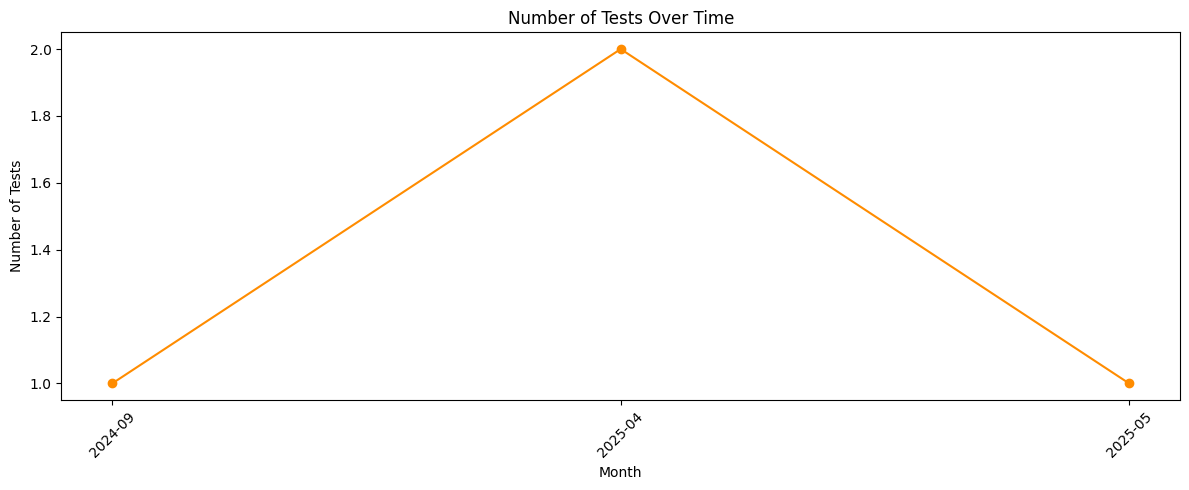

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(df['test_month'], df['test_count'], marker='o', color='darkorange')
plt.title('Number of Tests Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()